In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('carprices.csv - carprices.csv.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [50]:
df.shape

(13, 4)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 544.0+ bytes


In [52]:
dummy = pd.get_dummies(df['Car Model'])
dummy

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [53]:
import matplotlib.pyplot as plt

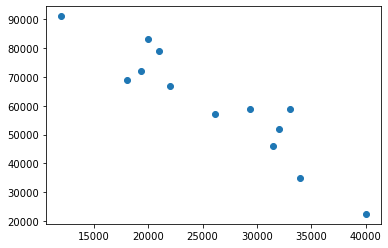

In [54]:
plt.scatter(df['Sell Price($)'],df['Mileage'])

<BarContainer object of 13 artists>

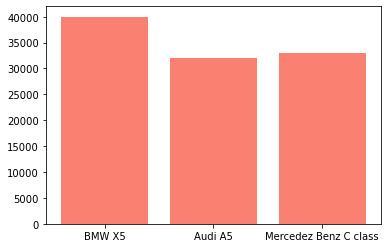

In [55]:
plt.bar(df['Car Model'],df['Sell Price($)'],color='salmon')

<BarContainer object of 13 artists>

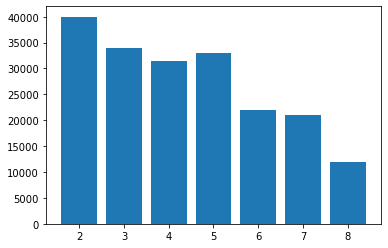

In [56]:
plt.bar(df['Age(yrs)'],df['Sell Price($)'])

In [57]:
df_dummy = pd.concat([dummy,df],axis=1)

In [58]:
df_dummy

,Audi A5,BMW X5,Mercedez Benz C class,Car Model,Mileage,Sell Price($),Age(yrs)
0,0,1,0,BMW X5,69000,18000,6
1,0,1,0,BMW X5,35000,34000,3
2,0,1,0,BMW X5,57000,26100,5
3,0,1,0,BMW X5,22500,40000,2
4,0,1,0,BMW X5,46000,31500,4
5,1,0,0,Audi A5,59000,29400,5
6,1,0,0,Audi A5,52000,32000,5
7,1,0,0,Audi A5,72000,19300,6
8,1,0,0,Audi A5,91000,12000,8
9,0,0,1,Mercedez Benz C class,67000,22000,6


In [59]:
df_dummy = df_dummy.drop('Car Model',axis=1)

In [60]:
df_dummy

,Audi A5,BMW X5,Mercedez Benz C class,Mileage,Sell Price($),Age(yrs)
0,0,1,0,69000,18000,6
1,0,1,0,35000,34000,3
2,0,1,0,57000,26100,5
3,0,1,0,22500,40000,2
4,0,1,0,46000,31500,4
5,1,0,0,59000,29400,5
6,1,0,0,52000,32000,5
7,1,0,0,72000,19300,6
8,1,0,0,91000,12000,8
9,0,0,1,67000,22000,6


In [61]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Audi A5                13 non-null     uint8
 1   BMW X5                 13 non-null     uint8
 2   Mercedez Benz C class  13 non-null     uint8
 3   Mileage                13 non-null     int64
 4   Sell Price($)          13 non-null     int64
 5   Age(yrs)               13 non-null     int64
dtypes: int64(3), uint8(3)
memory usage: 479.0 bytes


In [62]:
from sklearn.linear_model import LinearRegression

In [63]:
clf = LinearRegression()

In [71]:
df_dummy=df_dummy.drop('Mercedez Benz C class',axis=1)

In [72]:
X = df_dummy.drop('Sell Price($)',axis=1)
y = df['Sell Price($)']

In [73]:
clf.fit(X,y)

LinearRegression()

In [74]:
clf.score(X,y)

0.9417050937281082

In [76]:
X

,Audi A5,BMW X5,Mileage,Age(yrs)
0,0,1,69000,6
1,0,1,35000,3
2,0,1,57000,5
3,0,1,22500,2
4,0,1,46000,4
5,1,0,59000,5
6,1,0,52000,5
7,1,0,72000,6
8,1,0,91000,8
9,0,0,67000,6


In [78]:
clf.predict([[0,0,45000,4]])

array([36991.3172106])

In [79]:
clf.predict([[0,1,86000,7]])

array([11080.74313218])